In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
pd.set_option('display.max_columns', 500)
plt.rcParams["figure.figsize"] = (15,8)

# Exploratory Data Analysis

In [10]:
# Creating a copy of the training dataset to perform exploration on
housing = pd.read_csv('train.csv')

In [16]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Reservoir,2/17 Barton St,3,u,725000.0,S,HAR,17/03/2018,12.0,3073.0,NaN,NaN,NaN,NaN,NaN,NaN,Darebin City Council,NaN,NaN,Northern Metropolitan,21650.0
1,Bundoora,3/2 Greenwood Dr,2,u,521000.0,S,Barry,25/11/2017,12.1,3083.0,NaN,NaN,NaN,NaN,NaN,NaN,Banyule City Council,NaN,NaN,Northern Metropolitan,10175.0
2,Newport,29 Latrobe St,4,h,1340000.0,S,Raine&Horne,7/05/2016,8.4,3015.0,NaN,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,5498.0
3,Nunawading,8 Haros Av,3,h,805000.0,S,Fletchers,26/08/2017,15.4,3131.0,3.0,1.0,1.0,NaN,101.0,1950.0,Manningham City Council,-37.82658,145.17577,Eastern Metropolitan,4973.0
4,Fitzroy,17 Bell St,4,h,4011000.0,S,Nelson,27/11/2016,1.6,3065.0,4.0,3.0,2.0,286.0,275.0,1890.0,Yarra City Council,-37.79990,144.97550,Northern Metropolitan,5825.0


In [128]:
housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,21797.000000,2.179700e+04,21796.000000,21796.000000,16644.000000,16640.000000,16338.000000,14384.000000,8565.000000,9712.000000,16800.000000,16800.000000,21794.000000
mean,2.992430,1.049647e+06,11.281653,3114.188246,3.047465,1.593870,1.718815,591.364919,158.350177,1966.645078,-37.807090,144.997120,7554.558502
std,0.959153,6.395200e+05,6.779598,111.941638,0.963508,0.703608,1.000283,3965.171600,499.191911,36.892142,0.091150,0.120834,4482.745303
min,1.000000,1.120000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3046.000000,2.000000,1.000000,1.000000,216.750000,100.000000,1950.000000,-37.860700,144.925598,4294.000000
50%,3.000000,8.700000e+05,10.500000,3088.000000,3.000000,1.000000,2.000000,510.000000,133.000000,1970.000000,-37.800395,145.003085,6567.000000
75%,4.000000,1.300000e+06,14.000000,3153.000000,4.000000,2.000000,2.000000,664.000000,183.000000,2000.000000,-37.749308,145.068952,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,20.000000,9.000000,18.000000,433014.000000,44515.000000,2019.000000,-37.397800,145.526350,21650.000000


In [131]:
housing.select_dtypes(include='object').describe()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,21797,21797,21797,21797,21797,21797,21794,21794
unique,343,21479,3,5,324,78,33,8
top,Reservoir,1/1 Clarendon St,h,S,Nelson,28/10/2017,Boroondara City Council,Southern Metropolitan
freq,577,3,14741,14040,2211,702,2037,6841


### Observations
#### Numeric values
#### N/A
- Distance - 1
- Postcode - 1
- Bedroom - 25%
- Bathroom 25%
- Car - 25%
- Landsize - 30%
- BuildingArea - 80%
- YearBuilt - 60%
- Lat/Long - 25%
- Propertycount - 3

#### Other
- Lowest costing house is very low: $112,000 Maybe this is a property and no house?
- Postcode should be categorical, is also redundant due to Suburb
- Distance is in km
- Highest bedroom2 amount and rooms amount don't make sense bedroom has to be less than room
- 18 car spots seems too high
- BuildingArea and LandSize have very high max values
- YearBuilt might be better as BuildingAge
- Lat and Lon might not be important for the model
- Property count should be easily discernible from the Suburb/ Postcode values

#### Categoric values
#### N/A
- CouncilArea - 3
- Regionname - 3

#### Other
- Addresses should be all unique, potentially some repeated values
- Suburb, CouncilArea and RegionName are all kind of the same thing, with different granularity
- Method is dependent on the target variable and it should be removed

#### Datetime
- In string format
- Day of the week and season could be interesting augmentations of this column

In [20]:
housing['Suburb'].value_counts()

Reservoir         577
Bentleigh East    385
Richmond          344
Preston           334
Brunswick         313
                 ... 
Darley              1
Wildwood            1
Kalkallo            1
Riddells Creek      1
Montrose            1
Name: Suburb, Length: 343, dtype: int64

In [50]:
top_suburbs = list(housing['Suburb'].value_counts().sort_values(ascending=False).index)[0:9]
top_suburbs_mean = housing[housing['Suburb'].isin(top_suburbs)].groupby('Suburb').mean().round(2)
top_suburbs_mean

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Suburb,,,,,,,,,,,,,
Bentleigh East,3.26,1136076.33,13.86,3165.0,3.20,1.66,1.99,488.43,168.26,1977.35,-37.92,145.07,10969.0
Brunswick,2.55,965153.83,5.20,3056.0,2.62,1.28,1.16,325.44,120.15,1938.72,-37.77,144.96,11918.0
Essendon,2.95,1112961.96,7.76,3040.0,3.05,1.63,1.71,437.09,165.15,1966.28,-37.75,144.91,9264.0
Glenroy,2.93,656236.52,12.24,3046.0,2.98,1.32,2.10,576.08,123.41,1974.25,-37.70,144.92,8870.0
Northcote,2.75,1255257.27,5.39,3070.0,2.82,1.36,1.47,343.26,126.24,1939.20,-37.77,145.00,11364.0
Preston,2.82,868542.37,8.61,3072.0,2.93,1.37,1.81,450.95,127.35,1955.74,-37.74,145.01,14577.0
Reservoir,2.79,694025.22,11.58,3073.0,2.83,1.31,1.87,615.13,120.95,1974.92,-37.71,145.01,21650.0
Richmond,2.37,1077931.98,2.51,3121.0,2.46,1.44,1.10,446.27,103.68,1956.04,-37.82,145.00,14949.0
South Yarra,2.05,1044394.17,3.04,3141.0,2.07,1.37,1.05,697.21,96.70,1962.57,-37.84,144.99,14887.0


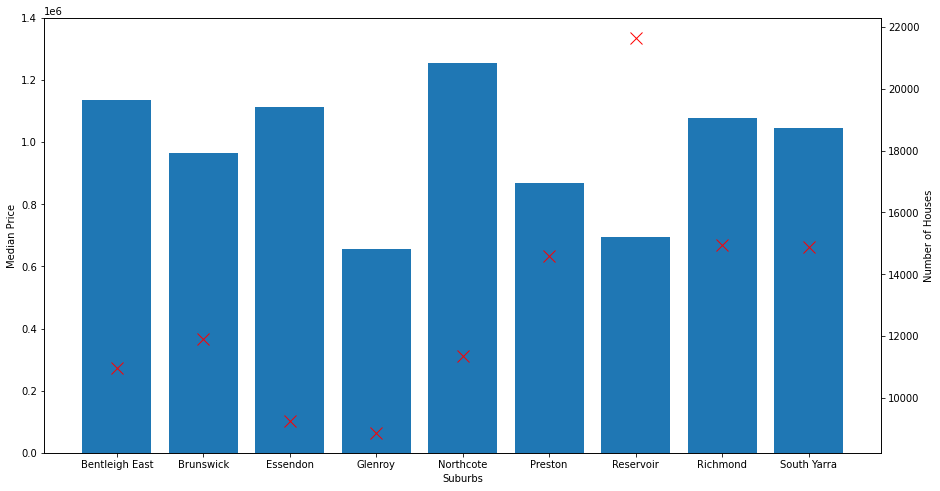

In [79]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(top_suburbs_mean.index, top_suburbs_mean['Price'])
ax2.plot(top_suburbs_mean.index, top_suburbs_mean['Propertycount'], 'rx', markersize=12)

ax1.set_ylim(0,1400000)
ax1.set_xlabel('Suburbs')
ax1.set_ylabel('Median Price')
ax2.set_ylabel('Number of Houses')

plt.show()

#### Observation 
Seems that most houses are in Reservoir, Bentleigh East, Richmond, Preston and Brunswick. Northcote, Richmond and South Yarra seem to be the most affluent suburbs. Will need to deal with scientific notation of the price column, should be able to achieve this by: df.apply(lambda x: '%.5f' % x, axis=1). There seems to be an inverse correlation with the number of houses in the suburb and the median house price, scarcity may be a good indicator of house price in these suburbs although Glenroy seems to be an exception.
Let's have a look at the most infrequently appearing suburbs.

In [101]:
bottom_suburbs = list(housing['Suburb'].value_counts().sort_values(ascending=True)[0:99].index)
bottom_suburbs_mean = housing[housing['Suburb'].isin(bottom_suburbs)].groupby('Suburb').mean().round(2)
bottom_suburbs_mean

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Suburb,,,,,,,,,,,,,
Albanvale,3.12,533687.50,14.0,3021.0,3.12,1.38,2.00,497.83,129.50,1986.75,-37.75,144.77,1899.0
Aspendale Gardens,3.80,946725.00,21.5,3195.0,3.80,2.10,1.90,548.83,136.67,1983.33,-38.02,145.12,2243.0
Attwood,4.08,789416.67,16.5,3049.0,4.09,1.91,2.09,618.62,196.62,1996.33,-37.67,144.89,1130.0
Bacchus Marsh,2.67,414000.00,37.5,3340.0,2.67,1.33,2.00,715.00,129.00,1973.00,-37.67,144.43,2871.0
Bayswater North,3.27,735826.67,23.2,3153.0,3.33,1.83,2.25,642.18,120.80,1987.00,-37.83,145.29,3598.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Williams Landing,3.67,631666.67,17.6,3027.0,3.67,2.00,2.00,418.50,222.00,2011.25,-37.86,144.74,1999.0
Wonga Park,4.00,1357500.00,25.2,3115.0,4.00,2.50,2.00,0.00,241.50,1910.00,-37.75,145.28,1328.0
Yarra Glen,3.00,620000.00,31.4,3775.0,3.00,2.00,1.00,863.00,180.56,1975.00,-37.65,145.37,1160.0


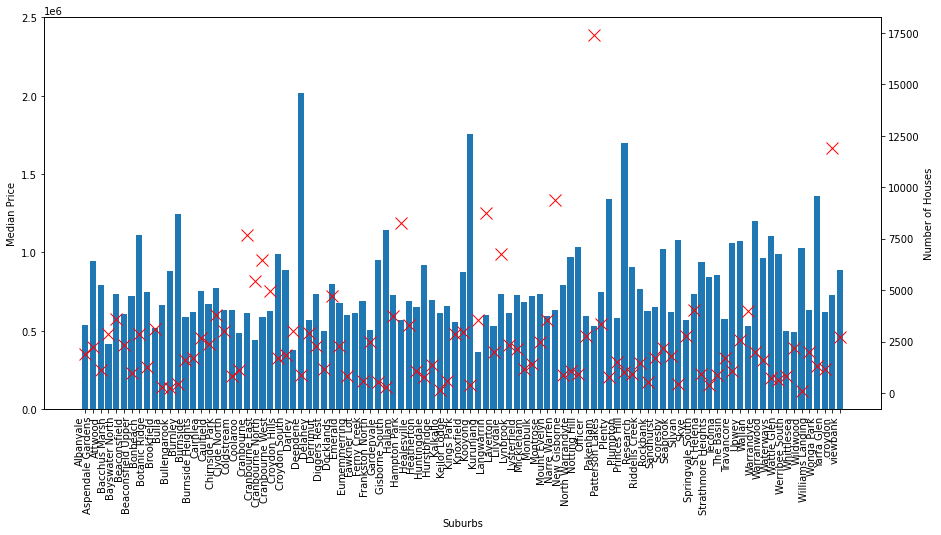

In [117]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(bottom_suburbs_mean.index, bottom_suburbs_mean['Price'])
ax2.plot(bottom_suburbs_mean.index, bottom_suburbs_mean['Propertycount'], 'rx', markersize=12)

ax1.set_ylim(0,2500000)
ax1.set_xlabel('Suburbs')
ax1.set_ylabel('Median Price')
ax2.set_ylabel('Number of Houses')
fig.autofmt_xdate(rotation=90)

plt.show()

### Observation
Interestingly, even with a small sample size that could result in high variance there does seem to be correlation to price with less frequently listed suburbs. Deepdene, Princess Hill and Knoxfield stand out with high prices. The information gathered from the top suburbs and my own understanding of Melbourne indicates that the suburbs with the highest median price are all in strong school districts. This could be further investigated by augmenting the dataset by adding data of top performing schools by ATAR or NAPLAN, or even a simpler dataset listing the number of schools per suburb. This could also indicate that there might be segments of the market to investigate, family homes are more likely to sell highly in suburbs with more schools, whereas apartments and other types of properties could be more closely linked with the lifestyle offered by other aspects of the suburb and not proximity to schools.

In [80]:
corr_matrix = housing.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price            1.000000
Rooms            0.468322
Bathroom         0.433573
Bedroom2         0.430401
Longtitude       0.195528
Car              0.195025
BuildingArea     0.090962
Postcode         0.042327
Landsize         0.035466
Propertycount   -0.056319
Distance        -0.208983
Lattitude       -0.213532
YearBuilt       -0.333117
Name: Price, dtype: float64

In [81]:
corr_matrix = housing[housing['Suburb'].isin(top_suburbs)].corr()
corr_matrix['Price'].sort_values(ascending=False)

Price            1.000000
Rooms            0.546309
Bedroom2         0.518580
BuildingArea     0.497073
Bathroom         0.384341
Car              0.203494
Postcode         0.176648
Longtitude       0.035225
Landsize        -0.013877
Distance        -0.192836
Propertycount   -0.219815
Lattitude       -0.257381
YearBuilt       -0.405397
Name: Price, dtype: float64

In [118]:
corr_matrix = housing[housing['Suburb'].isin(bottom_suburbs)].corr()
corr_matrix['Price'].sort_values(ascending=False)

Price            1.000000
Bathroom         0.308287
Rooms            0.304637
Bedroom2         0.297598
BuildingArea     0.106441
Longtitude       0.098744
Landsize         0.096107
Car              0.082449
Lattitude       -0.005917
Postcode        -0.226318
Propertycount   -0.250817
YearBuilt       -0.303442
Distance        -0.348962
Name: Price, dtype: float64

The property count does not seem to correlate at all in both cases, indicating that the observation above is incorrect. This does show that higher correlation can be reached with the target variable when taking the most frequently occurring suburbs.

In [151]:
housing[housing['Address'].duplicated(keep=False)].sort_values(by=['Address'])

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
10971,Preston,1 Bellarine St,5,h,1400000.0,PI,hockingstuart,3/06/2017,8.4,3072.0,5.0,2.0,2.0,558.0,217.0,1925.0,Darebin City Council,-37.73472,144.99658,Northern Metropolitan,14577.0
6216,Preston,1 Bellarine St,4,h,1400000.0,VB,Jellis,18/03/2017,8.8,3072.0,4.0,2.0,2.0,559.0,217.0,1925.0,Darebin City Council,-37.73470,144.99660,Northern Metropolitan,14577.0
1806,Essendon,1 Daisy St,4,h,1400000.0,VB,Nelson,8/04/2017,8.0,3040.0,4.0,2.0,1.0,267.0,NaN,NaN,Moonee Valley City Council,-37.75580,144.91060,Western Metropolitan,9264.0
2727,Essendon,1 Daisy St,4,h,1360000.0,S,Jellis,3/06/2017,7.5,3040.0,4.0,2.0,1.0,267.0,NaN,NaN,Moonee Valley City Council,-37.75472,144.92723,Western Metropolitan,9264.0
16888,Sunshine West,1 Diana Dr,3,h,770000.0,S,Jellis,28/10/2017,10.5,3020.0,3.0,2.0,2.0,NaN,167.0,2010.0,Brimbank City Council,-37.78880,144.78904,Western Metropolitan,6763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16260,Heidelberg Heights,97 Edwin St,4,h,1645000.0,PI,Fletchers,12/08/2017,8.8,3081.0,4.0,2.0,4.0,596.0,120.0,1930.0,Banyule City Council,-37.75008,145.05051,Eastern Metropolitan,2947.0
12683,Wheelers Hill,982 Waverley Rd,4,h,1150000.0,VB,Noel,11/11/2017,16.7,3150.0,4.0,2.0,2.0,698.0,NaN,NaN,Monash City Council,-37.89190,145.18990,South-Eastern Metropolitan,7392.0
19202,Wheelers Hill,982 Waverley Rd,4,h,1077000.0,S,Ray,27/01/2018,16.7,3150.0,4.0,2.0,2.0,697.0,NaN,NaN,Monash City Council,-37.89194,145.18994,South-Eastern Metropolitan,7392.0
3123,Carlton,99 Neill St,3,h,1600000.0,SP,Nelson,17/09/2016,1.8,3053.0,2.0,3.0,1.0,0.0,192.0,NaN,Melbourne City Council,-37.79450,144.97180,Northern Metropolitan,6786.0


It seems that some houses are listed twice within the time frame, where we would only be looking at the last listing, according to the Date column. There could also be the same address listed in different suburbs, so we can use that as a composite primary key. Before we do this, we need to copy the dataframe and convert the date column.

In [164]:
dupe = housing.copy()
dupe['Date'] = pd.to_datetime(dupe['Date'])

In [213]:
first_sold = dupe[dupe[['Suburb','Address']].duplicated(keep='first')].sort_values(by=['Date'], ascending=True)
first_sold = first_sold[['Suburb', 'Address', 'Price']] 

In [214]:
last_sold = dupe[dupe[['Suburb','Address']].duplicated(keep='last')].sort_values(by=['Date'], ascending=True)
last_sold = last_sold[['Suburb', 'Address', 'Price']]

In [219]:
dupe_houses = pd.merge(first_sold, last_sold, how='outer', on=['Suburb', 'Address'])
dupe_houses.sort_values(by='Price_x', inplace=True)
my_range = range(1,len(dupe_houses)+1)

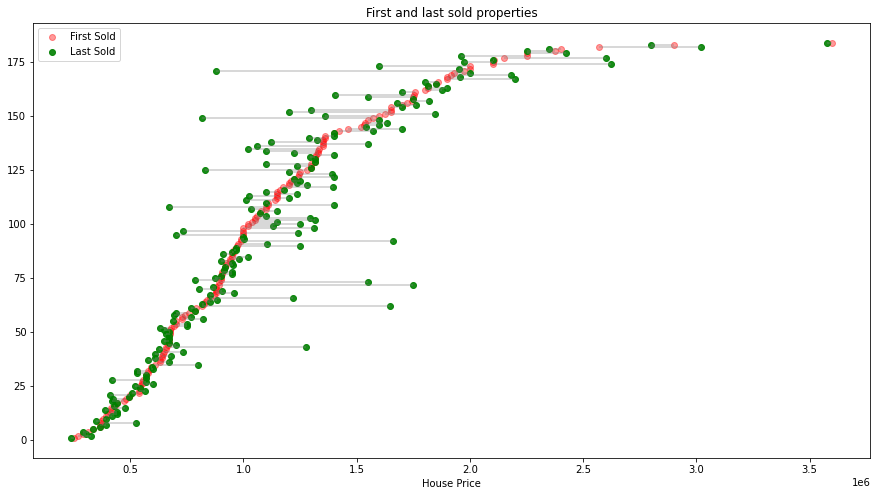

In [225]:
plt.hlines(y=my_range, xmin=dupe_houses['Price_x'], xmax=dupe_houses['Price_y'], color='grey', alpha=0.4)
plt.scatter(dupe_houses['Price_x'], my_range, color='red', alpha=0.4, label='First Sold')
plt.scatter(dupe_houses['Price_y'], my_range, color='green', alpha=0.9, label='Last Sold')
plt.legend()

plt.title('First and last sold properties', loc='center')
plt.xlabel('House Price')

plt.show()

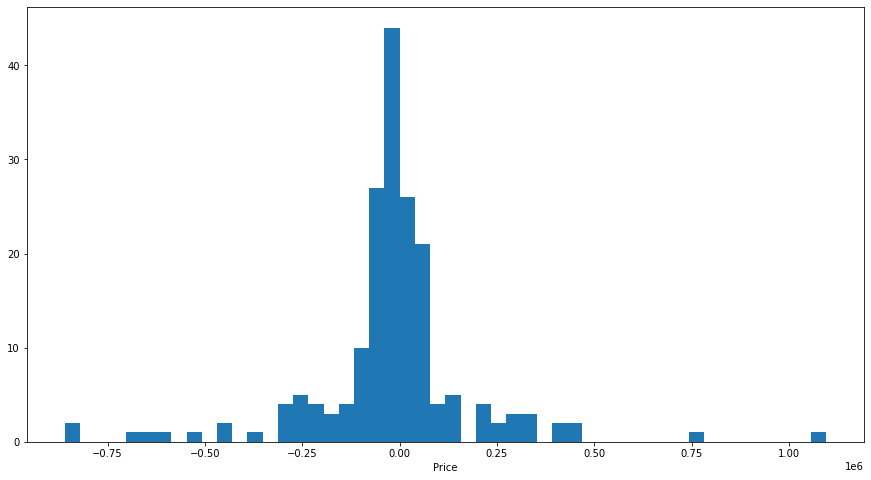

In [229]:
dupe_houses['price_diff'] = dupe_houses['Price_x'] - dupe_houses['Price_y']

plt.hist(dupe_houses['price_diff'], bins=50)
plt.xlabel('Price')

plt.show()

### Observations
Surprisingly, there is actually quite a bit of variation and it's not skewed positively, with some house being flipped for over 200k, and some houses losing around the same. We don't have to remove these values and they still contain some value, however, this indicates that there could be some relationship with time.

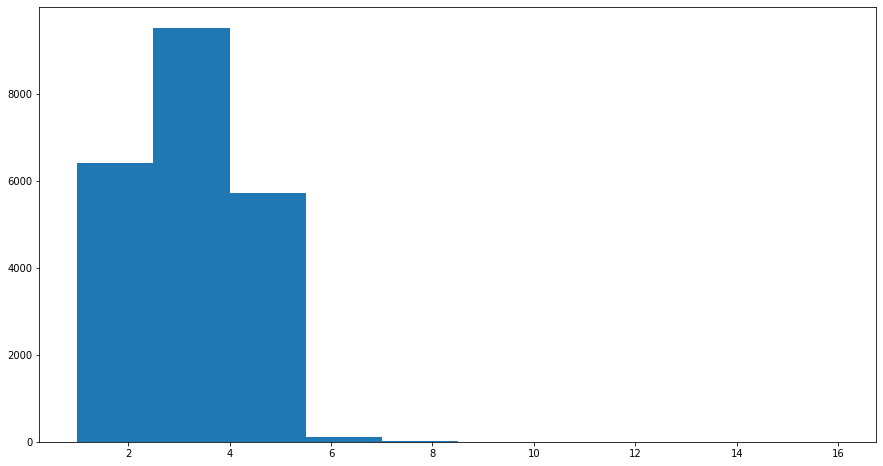

In [82]:
plt.hist(housing['Rooms'])
plt.show()

In [127]:
# Checking houses with a large number of rooms
len(df[df['Rooms'] > 6])

43

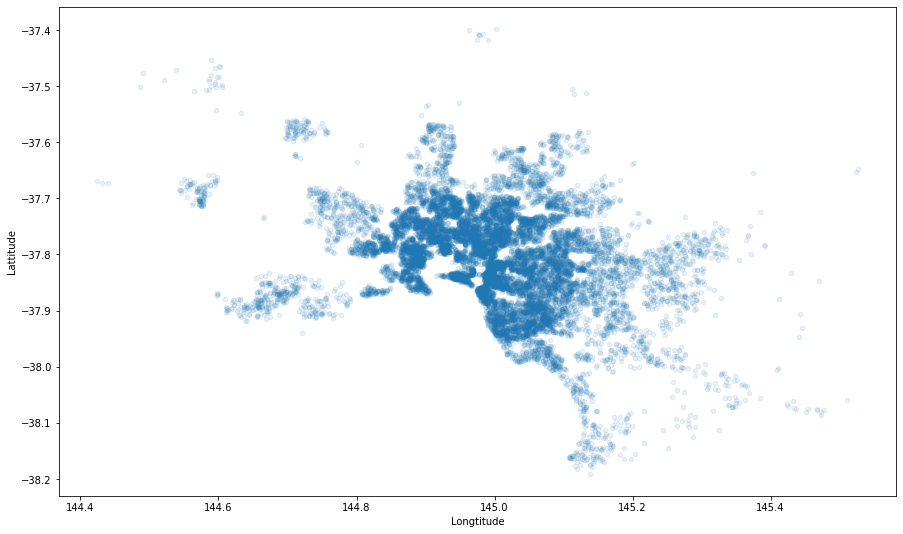

In [11]:
housing.plot(kind='scatter', x='Longtitude', y='Lattitude', alpha=0.1, figsize=(15,9))
plt.show()

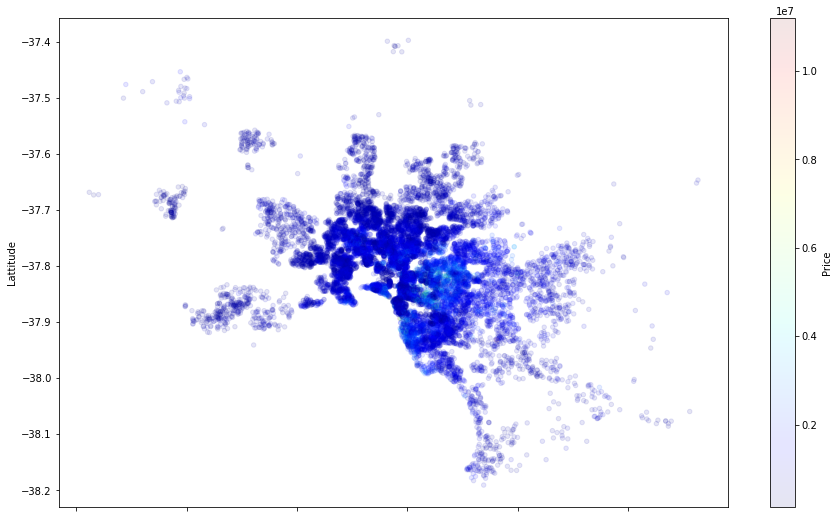

In [14]:
# Improving on the previous chart 
housing.plot(kind='scatter', x='Longtitude', y='Lattitude', alpha=0.1, figsize=(15,9), c='Price', cmap=plt.get_cmap('jet'), colorbar=True)
plt.show()

Seems that many of the more highly priced houses are located in the east of Melbourne's CBD.

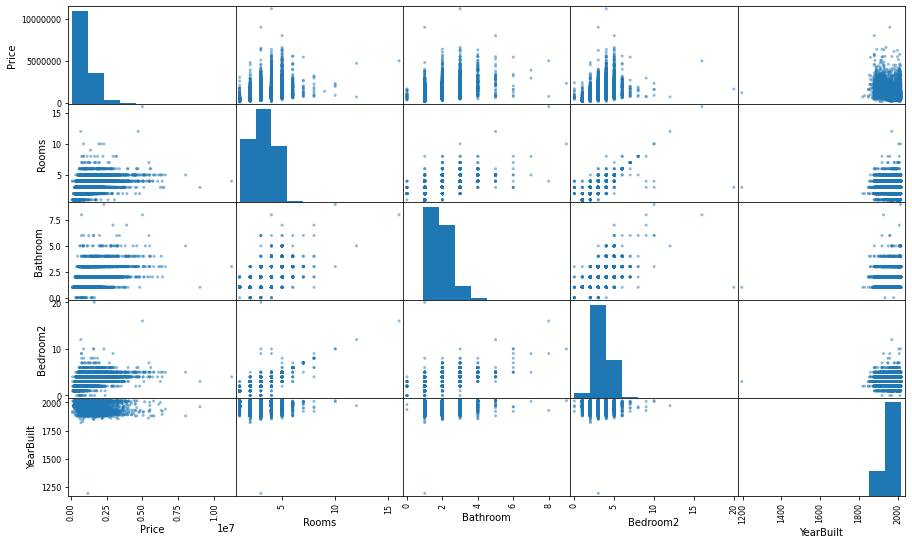

In [478]:
from pandas.plotting import scatter_matrix
attrs = ['Price', 'Rooms', 'Bathroom', 'Bedroom2','YearBuilt']
scatter_matrix(train[attrs], figsize=(15,9))
plt.show()

In [479]:
# Creating additional attributes that might provide better correlation
housing['BuildingAge'] = 2021 - housing['YearBuilt']
housing['BathroomsPerBedroom'] = housing['Bathroom']/housing['Bedroom2']
housing['LandsizeFromCBD'] = housing['Landsize']/housing['Distance']

In [480]:
corr_matrix = housing.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                  1.000000
Rooms                  0.468322
Bathroom               0.433573
Bedroom2               0.430401
BuildingAge            0.333117
Longtitude             0.195528
Car                    0.195025
BuildingArea           0.090962
BathroomsPerBedroom    0.048855
Postcode               0.042327
Landsize               0.035466
LandsizeFromCBD        0.025663
Propertycount         -0.056319
Distance              -0.208983
Lattitude             -0.213532
YearBuilt             -0.333117
Name: Price, dtype: float64

In [48]:
df[df['Distance'].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df = df[~df['Distance'].isna()]

In [62]:
df[['Bathroom', 'Bedroom2', 'Car']] = df[['Bathroom', 'Bedroom2', 'Car']].fillna(0)

In [64]:
df[df['Propertycount'].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,2017-07-15,5.1,3011.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,2017-11-11,7.7,3124.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df[df['Suburb'] == 'Footscray'].head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4377,Footscray,4/33 Ballarat Rd,3,t,585000.0,S,Nelson,2016-03-09,6.4,3011.0,3.0,1.0,1.0,259.0,NaN,NaN,Maribyrnong City Council,-37.7955,144.9063,Western Metropolitan,7570.0


In [68]:
df[df['Suburb'] == 'Camberwell'].head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2618,Camberwell,28 Brinsley Rd,4,h,2650000.0,S,Jellis,2016-03-09,7.8,3124.0,4.0,2.0,1.0,652.0,189.0,1890.0,Boroondara City Council,-37.8286,145.0686,Southern Metropolitan,8920.0


In [75]:
# Setting the PropertyCount value according to other houses in the same suburb
df.iloc[18523, -1] = 7570
df.iloc[26888, -1] = 8920

In [94]:
df_imputed = df.copy()

In [97]:
df_imputed['Landsize'].fillna(df['Landsize'].median(), inplace=True)
df_imputed['Landsize'].sort_values()

In [111]:
df_imputed[df_imputed['Landsize'] > 100000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18036,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,2017-12-08,2.1,3065.0,3.0,3.0,1.0,433014.0,NaN,NaN,Yarra City Council,-37.79751,144.98309,Northern Metropolitan,5825.0
26868,Bullengarook,65 Webb Rd,4,h,1050000.0,PI,Raine,2017-11-11,45.9,3437.0,4.0,2.0,1.0,146699.0,NaN,NaN,Macedon Ranges Shire Council,-37.47540,144.51300,Northern Victoria,249.0


In [114]:
# 389 Gore St landsize is actually 107m
df_imputed.loc[18036, 'Landsize'] = 107

<AxesSubplot:>

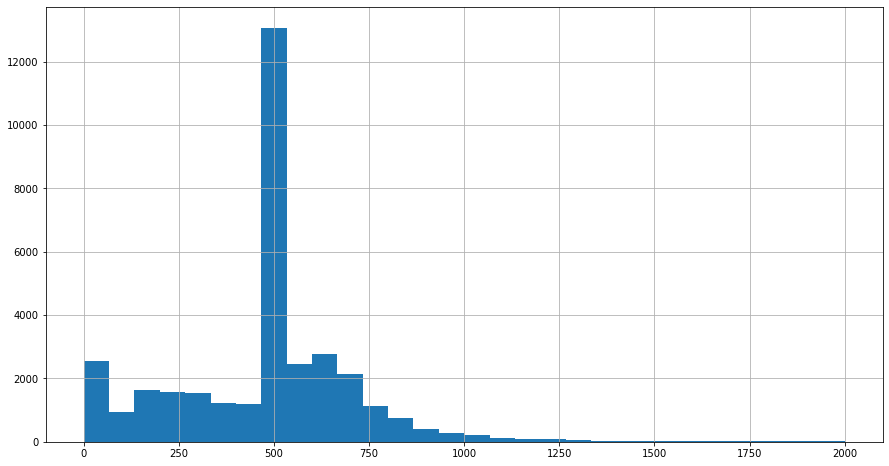

In [123]:
# Ignoring the outliers at the top of the range
df_imputed['Landsize'].hist(range=(0,2000), bins=30, figsize=(15,8))

500 metres squared looks like it might be overrepresented

In [130]:
# It doesn't seem as if these values were just added for no reason
df_imputed[df_imputed['Landsize'] == 500]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
391,Armadale,17 Egerton Rd,4,h,NaN,S,Marshall,2016-07-05,6.3,3143.0,4.0,1.0,2.0,500.0,NaN,NaN,Stonnington City Council,-37.86230,145.02230,Southern Metropolitan,4836.0
3195,Chadstone,4 Jacana Ct,4,h,1260000.0,S,McGrath,2017-02-25,13.6,3148.0,4.0,2.0,2.0,500.0,277.0,2001.0,Monash City Council,-37.88450,145.10270,Southern Metropolitan,3582.0
3335,Coburg,15 Autumn St,2,h,NaN,SN,Barry,2016-05-14,7.8,3058.0,2.0,1.0,2.0,500.0,111.0,1948.0,Darebin City Council,-37.73460,144.95000,Northern Metropolitan,11204.0
3423,Coburg,5/228 Reynard St,2,h,472000.0,S,Nelson,2016-06-27,7.8,3058.0,2.0,1.0,1.0,500.0,69.0,1975.0,Darebin City Council,-37.74700,144.95150,Northern Metropolitan,11204.0
3678,Doncaster,5 Iskandar Pl,5,h,1650000.0,VB,Jellis,2016-05-22,13.9,3108.0,5.0,4.0,2.0,500.0,429.0,2007.0,Manningham City Council,-37.78630,145.11050,Eastern Metropolitan,9028.0
6353,Malvern East,1 Deakin St,2,h,NaN,SN,Thomson,2017-04-03,11.2,3145.0,2.0,1.0,2.0,500.0,NaN,NaN,Stonnington City Council,-37.86450,145.04100,Southern Metropolitan,8801.0
6459,Malvern East,14 Nyora St,4,h,NaN,S,Jellis,2016-08-22,11.2,3145.0,3.0,2.0,0.0,500.0,NaN,NaN,Stonnington City Council,-37.86780,145.05170,Southern Metropolitan,8801.0
8318,Preston,171 Tyler St,4,h,750000.0,PI,Barry,2016-07-30,8.8,3072.0,3.0,2.0,2.0,500.0,150.0,1950.0,Darebin City Council,-37.73200,145.02090,Northern Metropolitan,14577.0
9782,Sunshine,7 Barnett St,3,h,675000.0,S,Bells,2016-08-13,12.6,3020.0,3.0,1.0,1.0,500.0,NaN,NaN,Brimbank City Council,-37.78210,144.84560,Western Metropolitan,3755.0
10727,Williamstown,11 Sandpiper Pl,4,h,2440000.0,S,Sweeney,2016-11-27,8.0,3016.0,4.0,3.0,3.0,500.0,278.0,2005.0,Hobsons Bay City Council,-37.86380,144.87980,Western Metropolitan,6380.0


In [133]:
# Filling the Building Area with the median value
df_imputed['BuildingArea'].fillna(df_imputed['BuildingArea'].median(), inplace=True)

In [139]:
df_imputed[df_imputed['BuildingArea'] > 2000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2466,Bulleen,19 Warringal St,4,h,1280000.0,S,Barry,2017-11-03,11.8,3105.0,4.0,1.0,2.0,732.0,6791.0,NaN,Manningham City Council,-37.76150,145.08970,Eastern Metropolitan,4480.0
2704,Camberwell,46 Athelstan Rd,5,h,2608000.0,S,Marshall,2016-10-15,7.8,3124.0,5.0,2.0,4.0,730.0,3112.0,1920.0,Boroondara City Council,-37.84240,145.06390,Southern Metropolitan,8920.0
4256,Fitzroy North,186 Queens Pde,2,t,930000.0,S,Nelson,2016-03-09,3.5,3068.0,2.0,3.0,0.0,2778.0,3558.0,NaN,Moreland City Council,-37.79030,144.98590,Northern Metropolitan,6244.0
14387,Frankston South,169 Humphries Rd,3,h,NaN,SP,hockingstuart,2017-01-07,38.0,3199.0,3.0,2.0,5.0,3617.0,3647.0,NaN,Frankston City Council,-38.18163,145.11457,South-Eastern Metropolitan,7566.0
15003,Glen Waverley,28 Brentwood Dr,5,h,NaN,PI,Ray,2017-03-06,16.7,3150.0,5.0,5.0,2.0,652.0,4645.0,NaN,Monash City Council,-37.90118,145.16986,Eastern Metropolitan,15321.0
22632,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,2017-09-23,48.1,3438.0,5.0,3.0,5.0,44500.0,44515.0,NaN,Macedon Ranges Shire Council,-37.45392,144.58864,Northern Victoria,849.0
29036,Riddells Creek,6 Southbourne Rd,5,h,NaN,SP,Raine,2017-11-25,47.4,3431.0,5.0,3.0,6.0,521.0,2002.0,2000.0,Macedon Ranges Shire Council,-37.45940,144.68910,Northern Victoria,1475.0
33405,Hampton East,1 Henrietta St,4,t,1180000.0,PI,Woodards,2018-03-17,13.8,3188.0,4.0,3.0,2.0,674.0,6178.0,NaN,Bayside City Council,-37.93825,145.03600,Southern Metropolitan,2356.0


In [141]:
# This indicates that Building area might be a bit of a dud field
df_imputed[df_imputed['BuildingArea'] > df_imputed['Landsize']]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,1.0,94.0,136.0,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34701,South Melbourne,219 Cecil St,3,h,1750000.0,S,Frank,2018-02-24,1.9,3205.0,3.0,1.0,1.0,104.0,133.0,1890.0,Port Phillip City Council,-37.83649,144.95965,Southern Metropolitan,5943.0
34702,South Melbourne,445 Clarendon St,3,h,1720000.0,S,Marshall,2018-02-24,1.9,3205.0,3.0,2.0,0.0,131.0,187.0,1890.0,Port Phillip City Council,-37.83811,144.96320,Southern Metropolitan,5943.0
34731,St Kilda,19 Bath St,2,h,NaN,SP,Marshall,2018-02-24,5.0,3182.0,2.0,1.0,0.0,129.0,136.0,1990.0,Port Phillip City Council,-37.86387,144.98668,Southern Metropolitan,13240.0
34841,Williamstown,5 Thompson St,2,h,940000.0,VB,Williams,2018-02-24,6.8,3016.0,2.0,2.0,1.0,122.0,136.0,1999.0,Hobsons Bay City Council,-37.86396,144.90541,Western Metropolitan,6380.0


In [144]:
df_imputed.drop(columns=['BuildingArea'], inplace=True)

In [146]:
df_imputed['YearBuilt']

0           NaN
1           NaN
2        1900.0
3           NaN
4        1900.0
          ...  
34852       NaN
34853    2018.0
34854    2000.0
34855       NaN
34856    1930.0
Name: YearBuilt, Length: 34856, dtype: float64

In [240]:
df_imputed.loc[13655, 'YearBuilt'] = 1910
df_imputed.loc[16424, 'YearBuilt'] = np.nan
df_imputed.loc[2453, 'YearBuilt'] = np.nan

In [241]:
df_imputed['BuildingAge'] = 2021 - df_imputed['YearBuilt']

In [242]:
df_imputed['BuildingAge'].fillna(df_imputed['BuildingAge'].median(), inplace=True)

<AxesSubplot:>

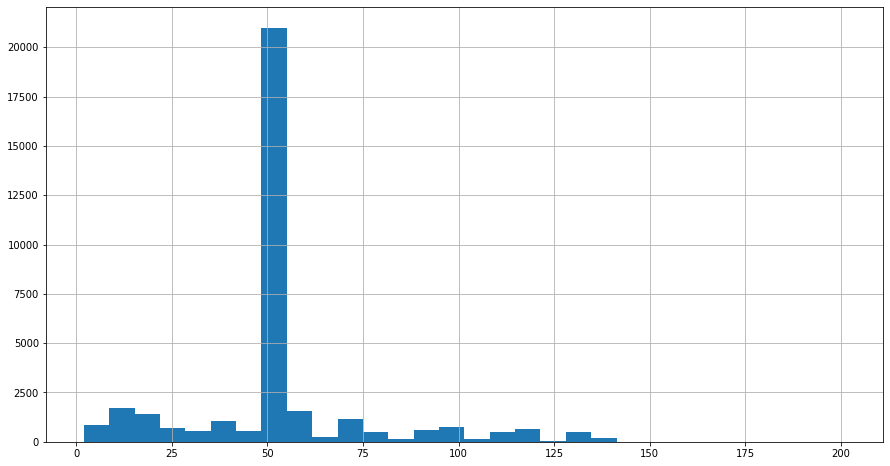

In [244]:
df_imputed['BuildingAge'].hist(bins=30, figsize=(15,8))

In [245]:
df_final = df_imputed.drop(columns='YearBuilt')

In [246]:
df_final['Price'] = df_final['Price']/1000
df_final['MedianPrice'] = df_final.groupby('Suburb')['Price'].transform('median')

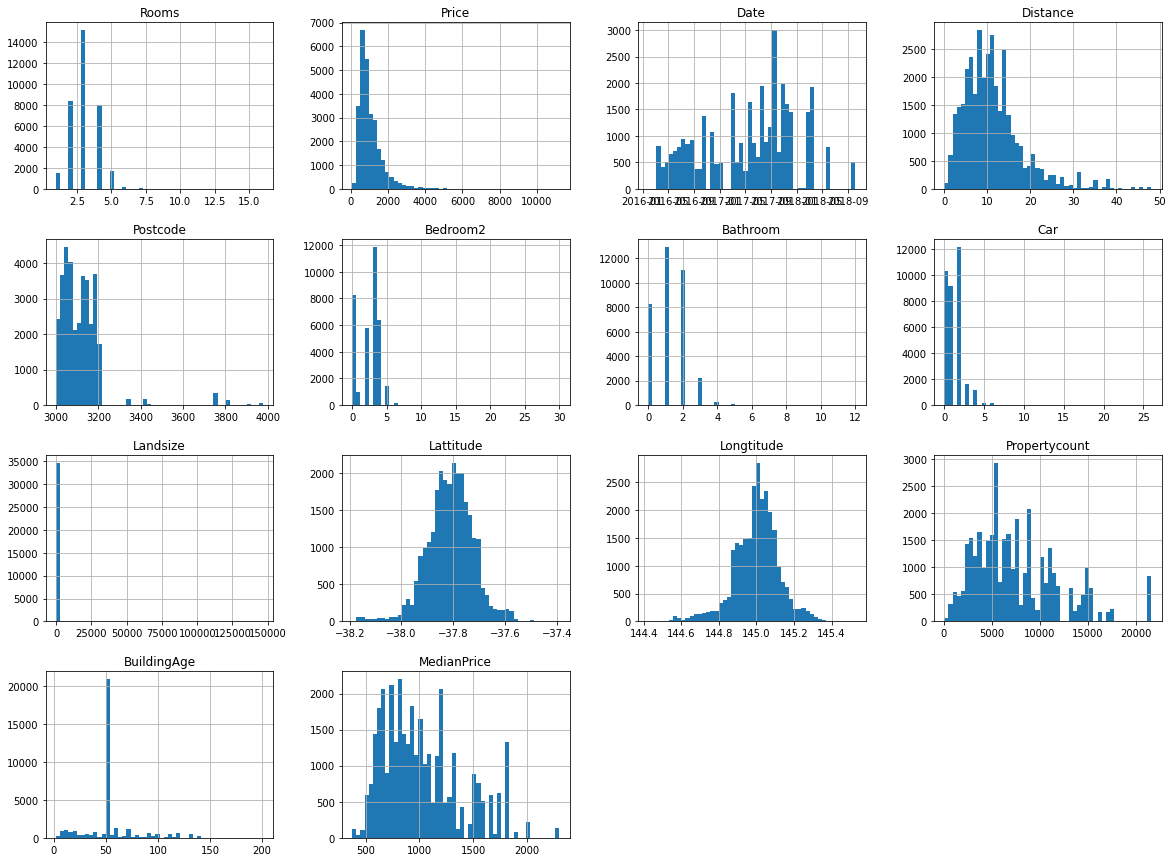

In [247]:
df_final.hist(bins=50, figsize=(20,15))
plt.show()

In [248]:
df_final.to_csv('train.csv', index=False)

In [249]:
train = pd.read_csv('train.csv')
train.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,BuildingAge,MedianPrice
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,2.0,1.0,1.0,126.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,51.0,1021.25
1,Abbotsford,85 Turner St,2,h,1480.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,51.0,1021.25
2,Abbotsford,25 Bloomburg St,2,h,1035.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,121.0,1021.25
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,3.0,2.0,1.0,0.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,51.0,1021.25
4,Abbotsford,5 Charles St,3,h,1465.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,121.0,1021.25


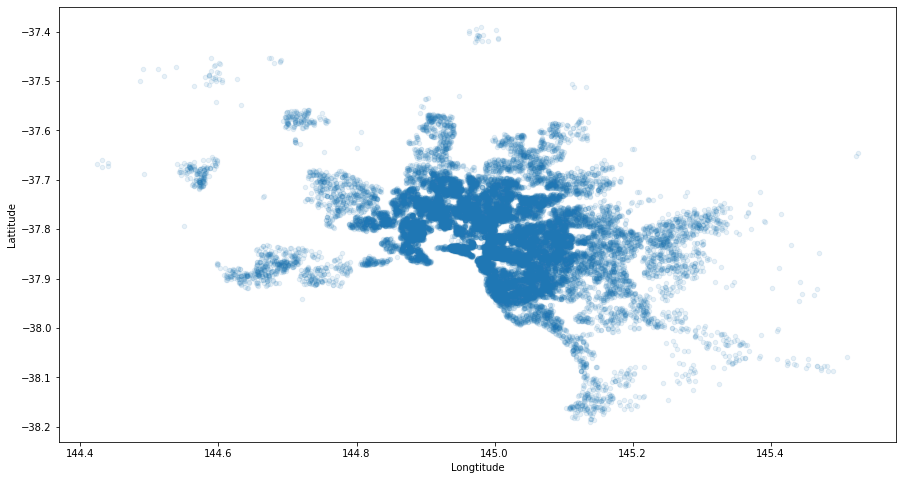

In [250]:
train.plot(kind='scatter', x='Longtitude', y='Lattitude', alpha=0.1, figsize=(15,8))
plt.show()

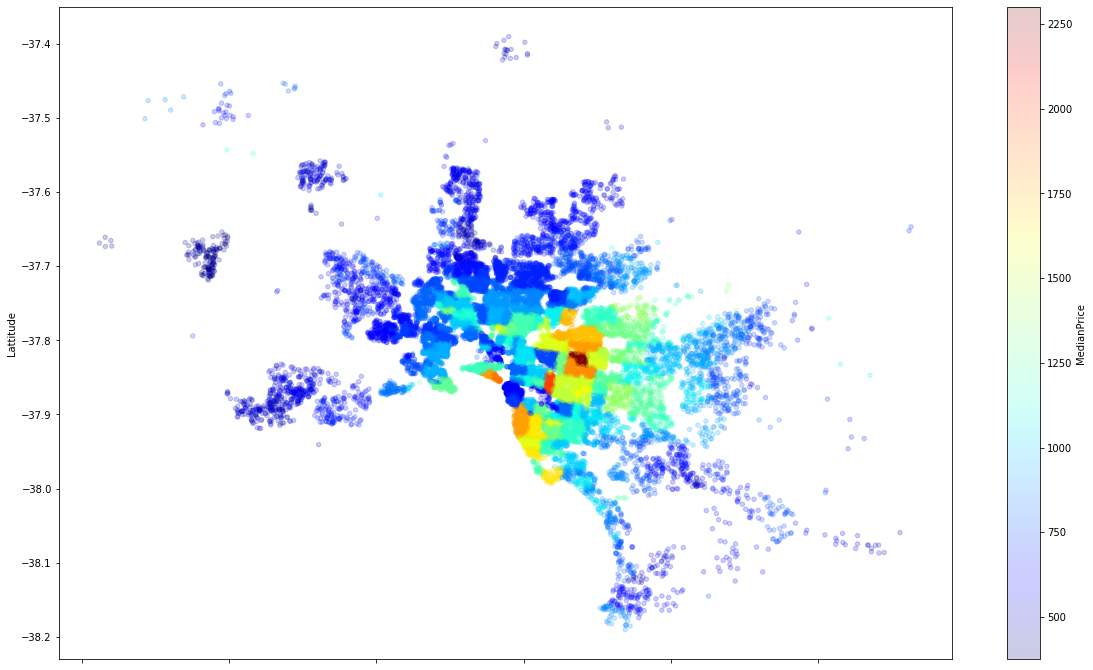

In [251]:
train.plot(kind='scatter', x='Longtitude', y='Lattitude', alpha=0.2, figsize=(20,12), c='MedianPrice', cmap=plt.get_cmap('jet'), colorbar=True)
plt.show()

In [252]:
corr_matrix = train.corr()

In [253]:
corr_matrix['Price'].sort_values(ascending=False)

Price            1.000000
MedianPrice      0.554749
Rooms            0.465242
Bathroom         0.339039
Bedroom2         0.301545
BuildingAge      0.238435
Car              0.201834
Longtitude       0.197874
Postcode         0.044950
Landsize         0.028902
Propertycount   -0.059020
Distance        -0.211384
Lattitude       -0.215607
Name: Price, dtype: float64

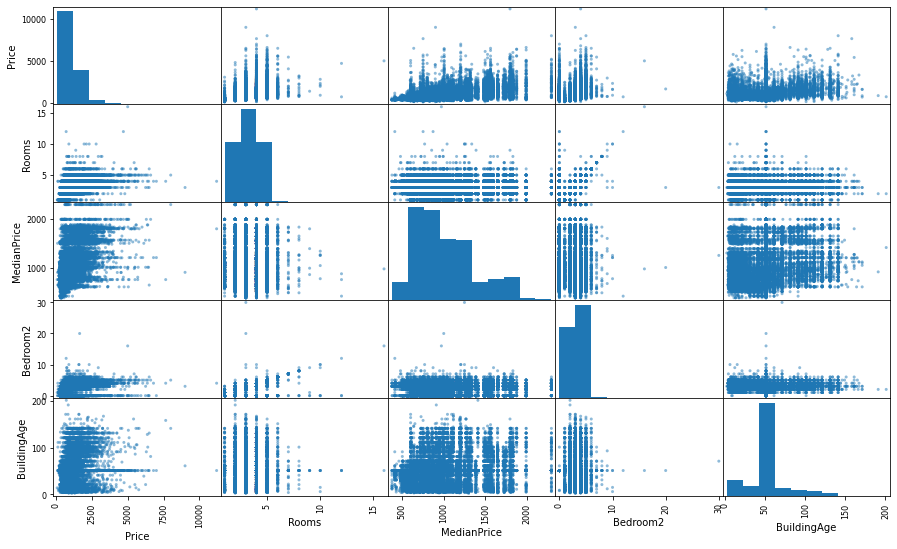

In [257]:
from pandas.plotting import scatter_matrix
attrs = ['Price', 'Rooms', 'MedianPrice', 'Bedroom2', 'BuildingAge']
scatter_matrix(train[attrs], figsize=(15,9))
plt.show()

In [258]:
train['BathroomsPerRoom'] = train['Bathroom']/train['Rooms']
train['MedianPricePerMetre'] = train['MedianPrice']/train['Landsize']

In [259]:
corr_matrix = train.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                  1.000000
MedianPrice            0.554749
Rooms                  0.465242
Bathroom               0.339039
Bedroom2               0.301545
BuildingAge            0.238435
Car                    0.201834
Longtitude             0.197874
BathroomsPerRoom       0.108757
Postcode               0.044950
Landsize               0.028902
MedianPricePerMetre    0.015497
Propertycount         -0.059020
Distance              -0.211384
Lattitude             -0.215607
Name: Price, dtype: float64